In [ ]:
import numpy as np

In [ ]:
import torch

In [ ]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [ ]:
import data_loaders

In [ ]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [ ]:
from deep_emotion import Deep_Emotion

In [ ]:
from generate_data import Generate_data

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print("cuda:0") if torch.cuda.is_available() else print("cpu")

cpu


In [ ]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            #print(outputs[0])
            #print(outputs[0])

            loss = criterion(outputs,labels)
            #print(labels[0])

            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")



In [ ]:
parser = argparse.ArgumentParser(description="Configuration of setup and training process")
parser.add_argument('-s', '--setup', type=bool, help='setup the dataset for the first time')


_StoreAction(option_strings=['-s', '--setup'], dest='setup', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='setup the dataset for the first time', metavar=None)

In [ ]:
parser.add_argument('-d', '--data', type=str,required= True,
                               help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)')


_StoreAction(option_strings=['-d', '--data'], dest='data', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)', metavar=None)

In [ ]:
parser.add_argument('-hparams', '--hyperparams', type=bool,
                               help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)')


_StoreAction(option_strings=['-hparams', '--hyperparams'], dest='hyperparams', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)', metavar=None)

In [ ]:
parser.add_argument('-e', '--epochs', type= int, help= 'number of epochs')
parser.add_argument('-lr', '--learning_rate', type= float, help= 'value of learning rate')
parser.add_argument('-bs', '--batch_size', type= int, help= 'training/validation batch size')
parser.add_argument('-t', '--train', type=bool, help='True when training')


_StoreAction(option_strings=['-t', '--train'], dest='train', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='True when training', metavar=None)

In [ ]:
epochs = 1500
lr = 0.001
batchsize = 128

In [ ]:
net = Deep_Emotion()

In [ ]:
net.to(device)

Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(50, 50, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(50, 10, kernel_size=(2, 2), stride=(1, 1))
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=9, bias=True)
  (softmax): Softmax(dim=1)
  (localization): Sequential(
    (0): Conv2d(1, 15, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, s

In [ ]:
print("Model archticture: ", net)

Model archticture:  Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(50, 50, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(50, 10, kernel_size=(2, 2), stride=(1, 1))
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=9, bias=True)
  (softmax): Softmax(dim=1)
  (localization): Sequential(
    (0): Conv2d(1, 15, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPoo

In [ ]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [ ]:
traincsv_file = "data" + "/"+"train.csv"
validationcsv_file = "data" + "/"+"val.csv"

In [ ]:
train_img_dir = "data"+"/"+"train/"

In [ ]:
validation_img_dir = "data"+"/"+"val/"

In [ ]:
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)


In [ ]:
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)


In [ ]:
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= 0.0001)


In [ ]:
Train(epochs, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================
Epoch: 1 	Training Loss: 0.01352283 	Validation Loss 0.01394671 	Training Acuuarcy 64.541% 	Validation Acuuarcy 65.366%
Epoch: 2 	Training Loss: 0.01350482 	Validation Loss 0.01404846 	Training Acuuarcy 64.687% 	Validation Acuuarcy 64.503%
Epoch: 3 	Training Loss: 0.01351534 	Validation Loss 0.01398192 	Training Acuuarcy 64.635% 	Validation Acuuarcy 64.809%
Epoch: 4 	Training Loss: 0.01349659 	Validation Loss 0.01399706 	Training Acuuarcy 64.823% 	Validation Acuuarcy 64.614%
Epoch: 5 	Training Loss: 0.01350902 	Validation Loss 0.01379753 	Training Acuuarcy 64.649% 	Validation Acuuarcy 65.840%
Epoch: 6 	Training Loss: 0.01350974 	Validation Loss 0.01388077 	Training Acuuarcy 64.600% 	Validation Acuuarcy 65.283%
Epoch: 7 	Training Loss: 0.01347865 	Validation Loss 0.01383290 	Training Acuuarcy 65.018% 	Validation Acuuarcy 65.506%
Epoch: 8 	Training Loss: 0.01349828 	Validation Loss 0.01379822 	Training A

In [ ]:
torch.cuda.is_available()

False

In [ ]:
GD = Generate_data("fer2013.csv")

In [ ]:
GD.split_test()

(28709, 3)
Done splitting the test file into validation & final test file


In [ ]:
GD.save_images("train")

100%|██████████████████████████████████| 28709/28709 [00:09<00:00, 2929.81it/s]

Done saving data/train data


In [ ]:
GD.save_images("test")

100%|████████████████████████████████████| 3589/3589 [00:01<00:00, 2441.81it/s]

Done saving data/test data


In [ ]:
GD.save_images("val")

100%|████████████████████████████████████| 3589/3589 [00:01<00:00, 2612.39it/s]

Done saving data/val data


In [ ]:
print("Final accuracy on the training set = ", 66.742)

Final accuracy on the training set =  66.742


In [ ]:
print("Final accuracy on the training set = ", 65.952)

Final accuracy on the training set =  65.952


In [ ]:
test_dataset= Plain_Dataset(csv_file="data/test.csv", img_dir = "data/test/", datatype = 'test', transform = transformation)


In [ ]:
print(test_dataset.__len__())

3589


In [ ]:
test_loader=   DataLoader(test_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

In [ ]:
print("Final accuracy on the testing set = ", test_correct/3589)

Final accuracy on the testing set =  tensor(0.6643)


In [ ]:
test_result

[torch.return_types.max(
 values=tensor([1.0000, 1.0000, 1.0000, 0.9987, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         0.9999, 0.8856, 1.0000, 1.0000, 1.0000, 1.0000, 0.9938, 1.0000, 0.9332,
         0.9178, 0.8048, 1.0000, 0.9946, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         0.9906, 0.9635, 0.8155, 0.9587, 1.0000, 0.9857, 0.6486, 1.0000, 1.0000,
         1.0000, 1.0000, 0.9999, 1.0000, 0.9826, 1.0000, 0.9990, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 0.9999, 1.0000, 0.9995, 0.8748, 0.9997,
         0.9994, 1.0000, 1.0000, 0.9845, 0.9991, 1.0000, 1.0000, 0.9980, 1.0000,
         0.9113, 1.0000, 1.0000, 1.0000, 1.0000, 0.9964, 1.0000, 0.9979, 0.9998,
         1.0000, 1.0000, 0.8722, 0.9975, 0.9995, 1.0000, 1.0000, 0.9963, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.7980, 1.0000, 1.0000, 1.0000,
         0.9836, 1.0000, 1.0000, 1.0000, 0.9764, 1.0000, 0.9761, 0.7647, 1.0000,
         1.0000, 0.5954, 0.5830, 0.9415, 1.0000, 1.0000, 1.0000, 0.9934, 0.99

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [ ]:
classes = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad',
        'Surprise', 'Neutral')

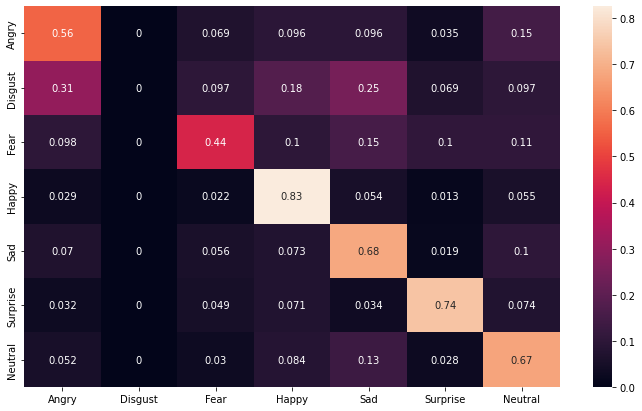

In [ ]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
labelstest["emotion"].value_counts()

3    902
6    633
4    586
2    500
0    490
5    406
1     72
Name: emotion, dtype: int64

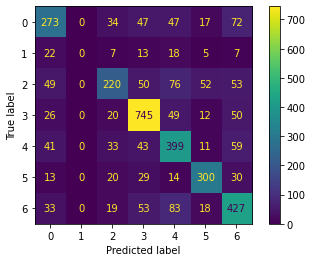

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_true,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(precision_score(y_true, y_pred, average = "micro"))

0.6586792978545556


In [ ]:
print(precision_score(y_true, y_pred, average = "macro"))

0.5567256847356071


/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(recall_score(y_true, y_pred, average = "micro"))

0.6586792978545556


In [ ]:
print(recall_score(y_true, y_pred, average = "macro"))

0.5596363423526033


Conclusions:
1. Data is extremely unbalanced
2. We decided to go for data augmentation

TypeError: Invalid shape (1, 48, 128, 48) for image data

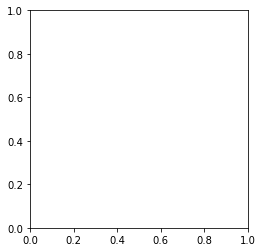

In [ ]:
count = 0
for image, label in test_loader:

    plt.imshow(image.permute(1,2,0,3))
    plt.show()
    print(f"Label: {label}")
    count += 1
    if(count == 10):
        break